In [1]:
import numpy as np
import torch 
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def f(x): return 3*x**2 - 4*x + 5

def df_dx(x): return 6*x - 4

In [3]:
f(3.0)

20.0

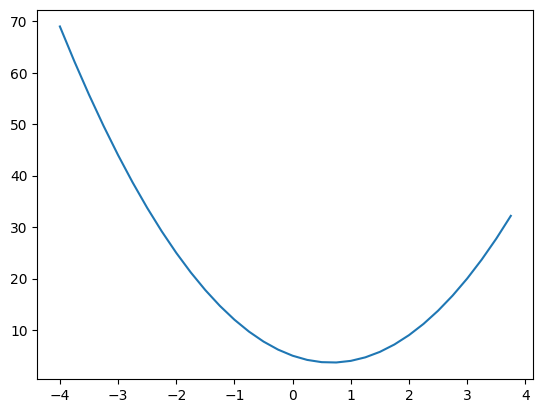

In [4]:
xs = np.arange(-4, 4, 0.25)
ys = f(xs)

plt.plot(xs, ys)

In [5]:
class Value:
  def __init__(self, data, _children=(), _op='', label='') -> None:
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self) -> str:
    return f'Value(data={self.data})'
  
  def __add__(self, other):
    output = Value(self.data + other.data, (self, other), '+')

    return output
  
  def __mul__(self, other):
    output = Value(self.data * other.data, (self, other), '*')
    return output

In [6]:
a = Value(2.0, label='a'); 
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'

d = e +c; d.label = 'd'
f = Value(-2.0, label='f')
L = d *f; L.label='L'


print(L)
print(L._prev)
print(L._op)
print(L.label)

Value(data=-8.0)
{Value(data=-2.0), Value(data=4.0)}
*
L


In [ ]:
from graphviz import Digraph